# Code de la régression logistique en grande dimension

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg.special_matrices import toeplitz
from numpy.random import multivariate_normal
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from scipy import misc
import itertools
import random
from scipy.optimize import minimize


# Question 2

### Simulation du modèle

In [121]:
n=1000
nb_features=50
b=-1
corr = 0.5
Toe=toeplitz(corr**np.arange(0,nb_features))
X = multivariate_normal(np.zeros(nb_features),Toe,n)
w=np.array([((-1)**(j-1))*np.exp(-j/10) if j<=10 else 0 for j in range(1,nb_features + 1)])

On simule ensuite des bernouilli de probabilité $\sigma(x_i^{T}w + b)$. On écrit d'abord la fonction sigmoid :

In [122]:
def sigmoid (z):
    return 1/(1+np.exp(-z))
p=sigmoid(X.dot(w)+b)

In [123]:
#simulation de bernoulli
y=np.random.binomial(1,p,n)
y[:] = 2 * y - 1
sum(y)

-354

### Simulation des données en dimension d=2

In [151]:
n=1000
nb_features=2
b=-1
corr = 0.5
Toe=toeplitz(corr**np.arange(0,nb_features))
X = multivariate_normal(np.zeros(nb_features),Toe,n)
w=np.array([((-1)**(j-1))*np.exp(-j/10) if j<=10 else 0 for j in range(1,nb_features + 1)])

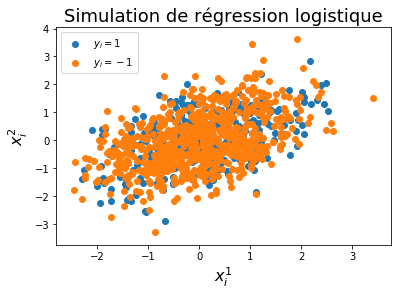

In [152]:
col = np.where(y==1,'b','r')
plt.scatter(*X[y == 1].T, label = r'$y_i = 1$')
plt.scatter(*X[y == -1].T, label = r'$y_i = -1$')

plt.title("Simulation de régression logistique",fontsize = 18)
plt.xlabel("$x_i^1$",fontsize=16)
plt.ylabel("$x_i^2$",fontsize=16)
plt.legend(loc='upper left')

plt.show()

Pour la suite on utilise la modèle à 50 variables.

# Question 3

In [124]:
logreg= LogisticRegression(solver='lbfgs')

In [125]:
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [126]:
logreg.coef_

array([[ 1.14203051e+00, -8.10992055e-01,  7.42857239e-01,
        -4.86831414e-01,  5.87229536e-01, -5.37498734e-01,
         4.05437783e-01, -4.54977270e-01,  2.72850027e-01,
        -1.86136089e-01, -1.37482741e-02, -6.88496822e-02,
         1.05337502e-03, -2.46200693e-02,  8.55866270e-02,
         8.40538172e-02,  7.85313977e-02, -6.91707965e-02,
         2.24148147e-02, -7.29327921e-02, -1.35728319e-01,
         8.99771366e-02, -1.59574729e-01,  4.86182153e-02,
        -6.32944596e-02,  3.32251584e-02, -5.17491210e-02,
        -5.08465665e-02,  1.00810347e-01,  4.07593641e-02,
        -8.28375166e-02,  1.07580594e-01, -1.88643516e-01,
         7.82625034e-02,  1.38927051e-01, -1.79751276e-01,
        -2.50735517e-02,  9.37280134e-02, -1.29340494e-02,
        -1.59448212e-02,  8.16132198e-02, -7.25082519e-02,
         9.32259059e-02, -7.39394857e-02,  7.09413384e-02,
        -1.32197755e-01, -5.36928322e-02, -1.88733886e-01,
         1.18583551e-01, -9.95250331e-03]])

In [127]:
logreg.intercept_

array([-1.03098637])

# Question 4

$w$ est maintenant un vecteur de taille d+1 contenant b

In [128]:
w1=np.hstack([b,w])

On rajoute une colonne de 1 à $X$

In [129]:
v=np.ones(n).reshape(n,1)

In [130]:
X1=np.hstack([v,X])

On implémente la moins log-vraisemblance:

In [131]:
def loss(w,y):
    return (1/n)*sum(np.log(1 + np.exp(-y*X1.dot(w))))

In [132]:
def lossTest(w):
    return (1/n)*sum(np.log(1 + np.exp(-y*X1.dot(w))))

In [133]:
loss(w1,y)

0.5162342325600245

On implémente la dérivée partielle par rapport à $w$ de la moins log-vraisemblance en $j$

In [134]:
def grad(w,j):
    return (1/n)*sum(-y*X1[:,j]*np.exp(-y*X1.dot(w))*(1/(1+np.exp(-y*X1.dot(w)))))         

In [135]:
grad(w1,0)

-0.00963659060573614

On vérifie la cohérence de nos résultats avec la fonction **minimize** en lui donnant en argument la fonction **lossTest** car elle ne prend qu'un seul argument:

In [136]:
res = minimize(lossTest,np.zeros(51),method='L-BFGS-B')

In [137]:
res

      fun: 0.4905803938370337
 hess_inv: <51x51 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.94049246e-07, -2.08721929e-06, -2.22044605e-07,  4.52415883e-06,
        2.11497486e-06, -2.69229083e-06, -1.33226763e-06,  2.58126853e-06,
        2.86992652e-06, -3.40283357e-06,  1.11022302e-06, -2.28150832e-06,
        1.48769885e-06,  1.89848137e-06,  5.38458167e-07,  3.99680289e-07,
        1.87072580e-06,  8.77076189e-07,  3.42503803e-06,  2.95319325e-06,
        3.34732242e-06,  8.88178420e-08,  4.62963001e-06,  1.08801856e-06,
        5.72875081e-06,  1.14352972e-06, -3.48054918e-06,  3.77475828e-07,
        1.93178806e-06, -7.16093851e-07, -2.95319325e-06, -4.16333634e-07,
       -8.93729535e-07, -1.61537450e-06, -1.78745907e-06, -2.29261055e-06,
        1.28230759e-06, -5.55111512e-08,  3.11972670e-06, -1.11022302e-07,
       -3.66373598e-07,  1.04916076e-06,  1.29896094e-06, -2.32036612e-06,
       -2.83661983e-06, -7.93809463e-07, -3.41948692e-06, -5.99520433e-07,
 

On remarque que la valeur de la fonction minimisée est très proche de notre fonction loss et que les estimations de $w$ sont-elles aussi très similaires.

# Question 5

### Calcul de la borne supérieur

In [138]:
def desc(A,i):
    return ((1/(4*n))*np.sum(A[:,i]*A[:,i]))

In [139]:
desc(X1,0)

0.25

# Question 6

### Inititialisation

In [140]:
max_iter=100

In [141]:
def coordinate_descent(X,y,max_iter):
    w2=np.zeros(nb_features+1)
    iter=0
    yplot=[]
    while iter<max_iter:
        
        perm=np.random.permutation(np.arange(nb_features))
        for i in perm:
            w2[i]=w2[i]-desc(X1,i)*grad(w2,i)
        iter=iter+1
        
        yplot.append(loss(w2,y))        

    plt.plot(yplot)
    plt.title("Descente de gradient par coordonnée",fontsize =18)
    plt.xlabel("Nombre d'itération",fontsize = 16)
    plt.ylabel("Valeur minisée",fontsize = 16)
    plt.show()
    return (print("Fonction minimisée:",loss(w2,y)),plt.show(),print("Estimation des coefficients:",w2))

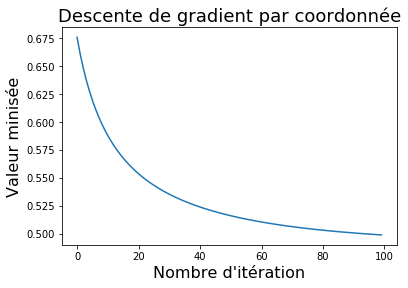

Fonction minimisée: 0.4991740721140753
Estimation des coefficients: [-0.90118185  0.88572537 -0.52340818  0.50748208 -0.30995708  0.41674425
 -0.3602663   0.25829336 -0.33741647  0.19803181 -0.13124036 -0.02597546
 -0.05860614 -0.01748722 -0.01072263  0.07259258  0.0493768   0.0898851
 -0.06162809  0.02244616 -0.06961563 -0.10309873  0.02568296 -0.09393462
 -0.00198845 -0.02666052  0.03977347 -0.04884318 -0.03922117  0.0744807
  0.02305882 -0.04412114  0.06630279 -0.13021255  0.04217654  0.10807681
 -0.13206383 -0.02141079  0.10205146 -0.04582306  0.00967632  0.07417753
 -0.03702712  0.04708277 -0.0456446   0.06950451 -0.12968259 -0.05319961
 -0.1289817   0.07551239  0.        ]


(None, None, None)

In [142]:
coordinate_descent(X1,y,max_iter)

# Question 7

### Moins log-vraisemblance avec pénalisation lasso :

In [143]:
def lossPen(w,y,lmda):
    return (1/n)*sum(np.log(1 + np.exp(-y*X1.dot(w)))) + lmda*(sum(abs(w)))

In [144]:
lossPen(w1,y,0.001)

0.5232446446624832

### Fonction Seuillage Doux : 

In [145]:
def seuillageDoux(z,t):
    if (abs(z)-t)>0:
        return np.sign(z)*(abs(z)-t)
    else:
        return 0

### Gradient Moins log-vraisemblance avec pénalisation lasso :

In [146]:
def gradDoux(w,j,lmda):
    return (1/n)*sum(-y*X1[:,j]*np.exp(-y*X1.dot(w))*(1/(1+np.exp(-y*X1.dot(w))))) + lmda*w[j]

In [147]:
def coordinate_descent_pen(X,y,max_iter,lmda):
    w2=np.zeros(nb_features+1)
    iter=0
    yplot=[]
    while iter<max_iter:
        
        perm=np.random.permutation(np.arange(nb_features))
        for i in perm:
            w2[i]=w2[i]-desc(X1,i)*gradDoux(w2,i,lmda)
            w2[i]=seuillageDoux(w2[i]-desc(X1,i)*gradDoux(w2,i,lmda),lmda*desc(X1,i))
        iter=iter+1
        
        yplot.append(lossPen(w2,y,lmda))        

    plt.plot(yplot)
    plt.title("Descente de gradient par coordonnée avec pénalisation",fontsize =18)
    plt.xlabel("Nombre d'itération",fontsize = 16)
    plt.ylabel("Valeur minisée",fontsize = 16)
    plt.show()
    return (print("Fonction minimisée:",lossPen(w2,y,lmda)),plt.show(),print("Estimation des coefficients:",w2))

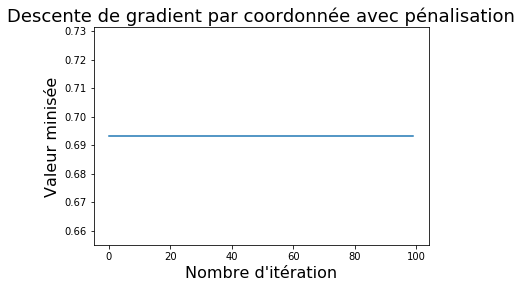

Fonction minimisée: 0.6931471805599322
Estimation des coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


(None, None, None)

In [148]:
coordinate_descent_pen(X1,y,max_iter,0.5)

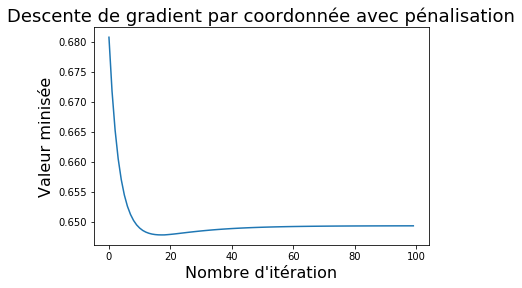

Fonction minimisée: 0.6493298016304783
Estimation des coefficients: [-0.54948282  0.43113198 -0.13002085  0.14585034  0.          0.0754906
 -0.03218316  0.         -0.05798699  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.01695256  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.02196783  0.
  0.          0.          0.        ]


(None, None, None)

In [149]:
coordinate_descent_pen(X1,y,max_iter,0.05)

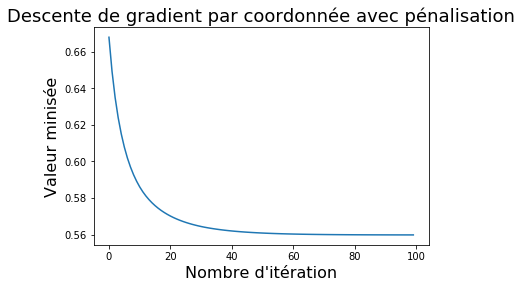

Fonction minimisée: 0.5599157893689729
Estimation des coefficients: [-0.82230405  0.82468977 -0.50351031  0.47048698 -0.274965    0.36651102
 -0.31207865  0.21254112 -0.27323137  0.1378051  -0.1033091  -0.00302956
 -0.04711633  0.          0.          0.04447956  0.03040144  0.04859828
 -0.00790635  0.         -0.04677128 -0.0767659   0.         -0.07227529
  0.          0.          0.         -0.01655    -0.00460681  0.01096819
  0.          0.          0.01403299 -0.06287137  0.00339804  0.07401133
 -0.08441778  0.          0.03809213  0.          0.          0.03809973
  0.          0.          0.          0.00633118 -0.08828056 -0.03225732
 -0.0821556   0.02010549  0.        ]


(None, None, None)

In [150]:
coordinate_descent_pen(X1,y,max_iter,0.01)